In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import statistics

In [103]:
start = "2017-01-01"
end = "2022-01-01"

In [104]:
data = yf.download("AAPL",start = start, end = end)

[*********************100%***********************]  1 of 1 completed


In [105]:
print(data.shape)
data.head()

(1259, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.297691,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.267139,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.405807,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.711329,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.965153,134247600


In [106]:
X = data.drop("Close",axis = 1)
y = data["Close"]

In [121]:
def Exp_moving_avg(volume, close, days):
    ema_values = []
    ema_values.append(volume[0])
    for i in range(1,len(volume)):
        num = (close[i] * (2/(1+days))) + (volume[i-1] * (1 - (2/(1+days))))
        ema_values.append(num)
    return ema_values

In [122]:
X["Exp_moving_avg"] = Exp_moving_avg(data["Volume"], data["Close"], 60)

<AxesSubplot:xlabel='Date'>

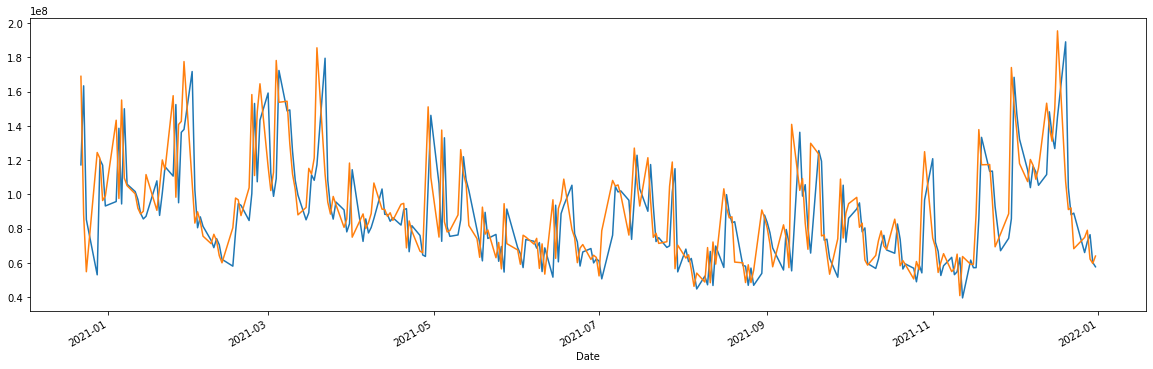

In [123]:
X["Exp_moving_avg"][1000:].plot(figsize = (20,6))
X["Volume"][1000:].plot()

In [159]:
"""
* Middle Band = 20-day simple moving average (SMA)
* Upper Band = 20-day SMA + (20-day standard deviation of price x 2) 
* Lower Band = 20-day SMA - (20-day standard deviation of price x 2)
"""

def bollinger_bands(Open,days):
    
    roll_avg = Open.rolling(days).mean()
    std_dev = Open.rolling(days).std()

    middle_band = roll_avg
    upper_band = roll_avg + (2 * std_dev)
    lower_band = roll_avg - (2 * std_dev)
        
    return middle_band, upper_band, lower_band

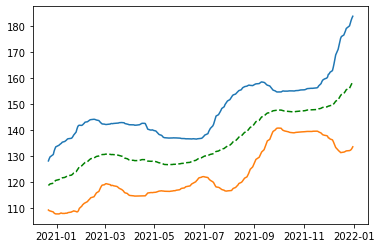

In [167]:
X["middle"],X["upper"],X["lower"] = bollinger_bands(data["Open"],60)
plt.plot(X["upper"][1000:])
plt.plot(X["lower"][1000:])
plt.plot(X["middle"][1000:], "g--")

In [166]:
X.head(70)

,Open,High,Low,Adj Close,Volume,Exp_moving_avg,middle,upper,lower
Date,,,,,,,,,
2017-01-03,28.950001,29.082500,28.690001,27.297691,115127600,1.151276e+08,NaN,NaN,NaN
2017-01-04,28.962500,29.127501,28.937500,27.267139,84472400,1.113529e+08,NaN,NaN,NaN
2017-01-05,28.980000,29.215000,28.952499,27.405807,88774400,8.170281e+07,NaN,NaN,NaN
2017-01-06,29.195000,29.540001,29.117500,27.711329,127007600,8.586376e+07,NaN,NaN,NaN
2017-01-09,29.487499,29.857500,29.485001,27.965153,134247600,1.228434e+08,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2017-04-06,36.072498,36.130001,35.862499,33.909508,84596000,1.072365e+08,33.400250,37.686772,29.113728
2017-04-07,35.932499,36.044998,35.817501,33.833977,66688800,8.182236e+07,33.504375,37.726826,29.281924
2017-04-10,35.900002,35.970001,35.724998,33.793842,75733600,6.450228e+07,33.607292,37.755389,29.459195
